Design Effectiveness
- Was the experiment well-structured?
- Were clients randomly and equally divided between the old and new designs?
- Were there any biases?

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [9]:
df_merge = pd.read_csv('../../data/clean/final_clean_client_df.csv')
df_merge

,Unnamed: 0,client_id,visitor_id,visit_id,step,date_time,tenure_years,tenure_months,age,gender,accounts,balance,calls_last_6_months,logons_last_6_months,stepped_back,error_count,variation
0,0,169,201385055_71273495308,749567106_99161211863_557568,4,2017-04-12 20:23:09,21,262,47,Male,2,501570.72,4,4,False,4,Unknown
1,1,169,201385055_71273495308,749567106_99161211863_557568,3,2017-04-12 20:22:05,21,262,47,Male,2,501570.72,4,4,True,4,Unknown
2,2,169,201385055_71273495308,749567106_99161211863_557568,2,2017-04-12 20:20:31,21,262,47,Male,2,501570.72,4,4,True,4,Unknown
3,3,169,201385055_71273495308,749567106_99161211863_557568,1,2017-04-12 20:19:45,21,262,47,Male,2,501570.72,4,4,True,4,Unknown
4,4,169,201385055_71273495308,749567106_99161211863_557568,0,2017-04-12 20:19:36,21,262,47,Male,2,501570.72,4,4,True,4,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443767,443767,9999839,948322592_28990736246,715530422_68620416793_515645,3,2017-03-29 12:12:28,13,160,28,Female,2,67425.35,3,3,True,4,Unknown
443768,443768,9999839,948322592_28990736246,715530422_68620416793_515645,2,2017-03-29 12:11:50,13,160,28,Female,2,67425.35,3,3,True,4,Unknown
443769,443769,9999839,948322592_28990736246,715530422_68620416793_515645,1,2017-03-29 12:11:35,13,160,28,Female,2,67425.35,3,3,True,4,Unknown
443770,443770,9999839,948322592_28990736246,715530422_68620416793_515645,0,2017-03-29 12:11:32,13,160,28,Female,2,67425.35,3,3,True,4,Unknown


In [10]:
# Estadísticas descriptivas por grupo
df_merge.groupby('variation').agg({
    'balance': ['mean', 'std'],
    'tenure_years': ['mean', 'std'],
    'age': ['mean', 'std'],
    'accounts': ['mean', 'std'],
    'calls_last_6_months': ['mean', 'std'],
    'logons_last_6_months': ['mean', 'std']
})

balance                tenure_years                  age  \
                    mean            std         mean       std       mean   
variation                                                                   
Control    158890.548298  302690.544755    12.167794  6.980923  48.008813   
Test       162323.086001  368410.852527    12.182025  6.940522  48.419512   
Unknown    153694.906564  323107.833347    12.369430  7.109139  45.122101   

                      accounts           calls_last_6_months            \
                 std      mean       std                mean       std   
variation                                                                
Control    15.631206  2.272676  0.551134            3.267693  2.184396   
Test       15.665891  2.253690  0.532044            3.201986  2.201277   
Unknown    15.764908  2.269177  0.547233            4.254183  2.195194   

          logons_last_6_months            
                          mean       std  
variation                                 
Control               6.303555  2.171217  
Test                  6.242124  2.186744  
Unknown               4.291380  2.180587

/home/bru/Code/ironhack/week-5/vanguard-cx-project/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


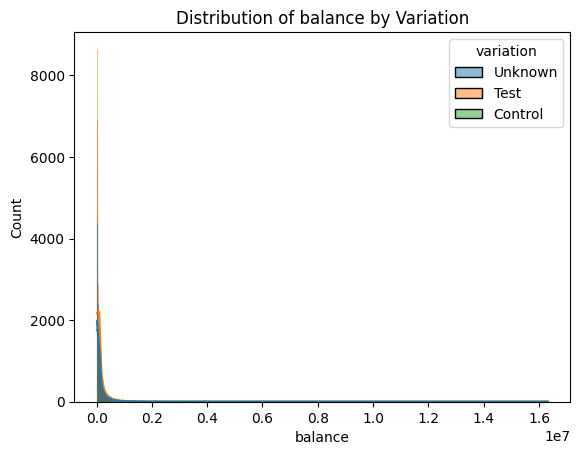

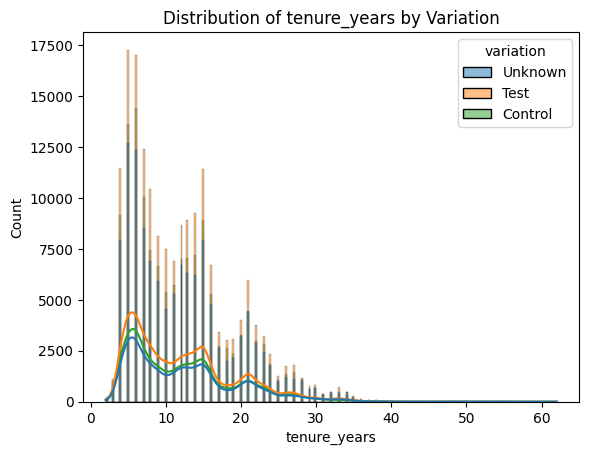

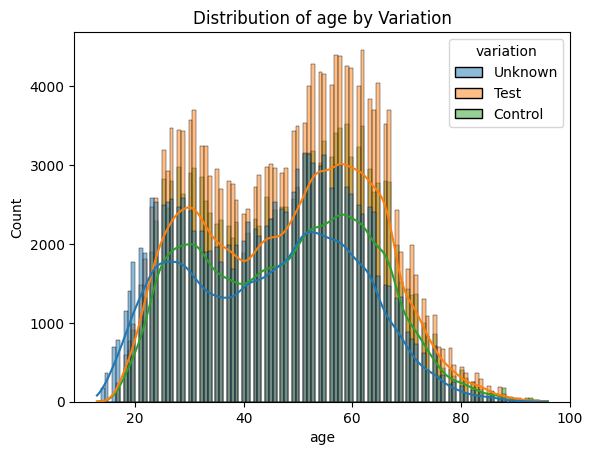

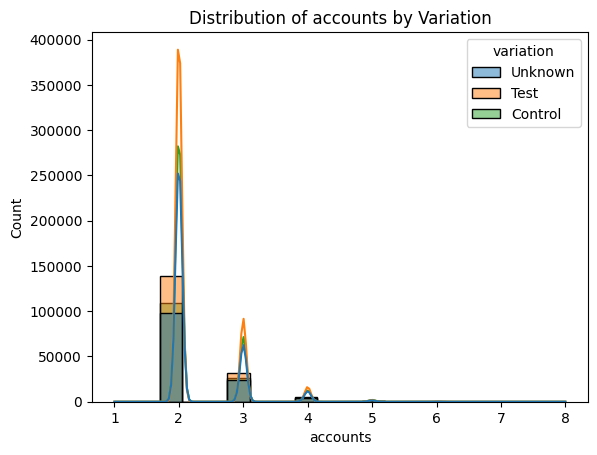

In [11]:
variables = ['balance', 'tenure_years', 'age', 'accounts']
for var in variables:
    sns.histplot(data=df_merge, x=var, hue='variation', kde=True)
    plt.title(f'Distribution of {var} by Variation')
    plt.show()

In [12]:
# Comparar balance entre los grupos
anova_balance = f_oneway(
    df_merge[df_merge['variation'] == 'Control']['balance'],
    df_merge[df_merge['variation'] == 'Test']['balance'],
    df_merge[df_merge['variation'] == 'Unknown']['balance']
)
print('ANOVA for balance:', anova_balance)

ANOVA for balance: F_onewayResult(statistic=np.float64(24.348000807164112), pvalue=np.float64(2.669179188604717e-11))


Pregunta: Como podria saber cuales fueron estas pequeñas diferencias que sugiere ANOVA?

Para identificar las pequeñas diferencias específicas que sugiere el ANOVA, puedes realizar una prueba post hoc. Una de las más utilizadas es la prueba de Tukey HSD (Honestly Significant Difference), que identifica cuáles pares de grupos tienen diferencias estadísticamente significativas.

In [13]:
# Preparar los datos
balance_values = df_merge['balance']  # Valores del balance
variation_groups = df_merge['variation']  # Grupos de variación

# Realizar la prueba de Tukey
tukey_result = pairwise_tukeyhsd(endog=balance_values, groups=variation_groups, alpha=0.05)

# Mostrar los resultados
print(tukey_result)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
 group1  group2  meandiff  p-adj    lower      upper    reject
--------------------------------------------------------------
Control    Test  3432.5377 0.0118   618.3032  6246.7722   True
Control Unknown -5195.6417 0.0002 -8246.0182 -2145.2653   True
   Test Unknown -8628.1794    0.0 -11526.757 -5729.6019   True
--------------------------------------------------------------


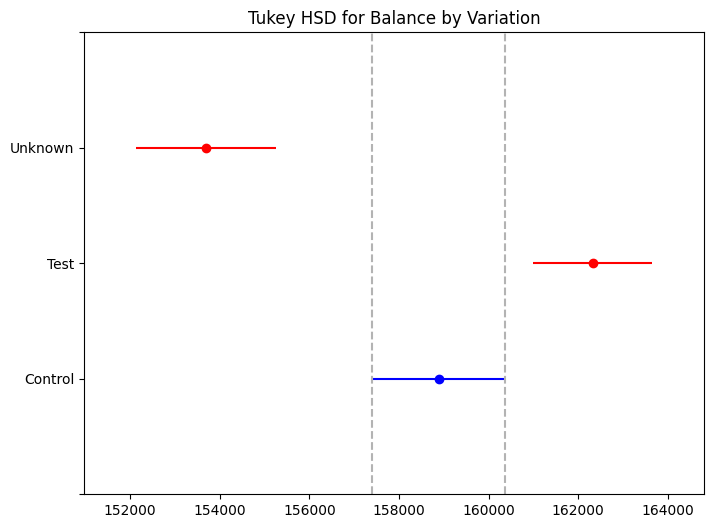

In [14]:
tukey_result.plot_simultaneous(comparison_name='Control', figsize=(8, 6))
plt.title('Tukey HSD for Balance by Variation')
plt.show()

Interpretación gráficos

Distribución del balance:
- Todas las variaciones muestran distribuciones altamente sesgadas hacia balances bajos. Esto implica que la mayoría de los clientes tienen balances más bajos, independientemente del grupo.
- Visualmente, no hay diferencias evidentes entre los grupos, lo que sugiere que el ANOVA detectó una diferencia significativa en los promedios que no es fácil de observar directamente.

Distribución de Tenure Years:
- La distribución es similar para todos los grupos, con un pico en los clientes con menos de 10 años de antigüedad y una disminución gradual a medida que aumenta el número de años.

Distribución de la edad:
- Aunque los grupos tienen distribuciones similares, el grupo Unknown parece tener una mayor proporción de clientes jóvenes (20-30 años).

Distribución del número de cuentas:
- La mayoría de los clientes tienen 2 cuentas. Las distribuciones son muy similares entre los grupos.

Conclusión

El experimento parece estar bien equilibrado en términos de métricas clave como antigüedad, edad y número de cuentas.
Aunque el ANOVA muestra diferencias significativas en el balance promedio, la magnitud de la diferencia parece ser pequeña y no necesariamente significativa en términos prácticos. Esto sugiere que el diseño del experimento es razonablemente equitativo, aunque podría haber pequeñas diferencias que deberían ser consideradas en los análisis.

Conclusión 2

Con base en los resultados obtenidos, tanto del ANOVA como del test de comparación de Tukey:

Diferencias significativas entre grupos:

El ANOVA indicó que existen diferencias estadísticamente significativas en los balances promedio entre los grupos (p-value ≈ 2.67e-11).
El test de Tukey confirma cuáles son las comparaciones entre grupos que presentan diferencias significativas:

- Control vs Test: Existe una diferencia positiva significativa en el balance promedio (meandiff ≈ 3432.54), lo que indica que el grupo de prueba (Test) tiene balances promedio mayores que el grupo control.
- Control vs Unknown: Existe una diferencia negativa significativa (meandiff ≈ -5195.64), lo que indica que el grupo Unknown tiene balances promedio menores que el grupo control.
- Test vs Unknown: También se observa una diferencia negativa significativa (meandiff ≈ -8628.18), lo que significa que el grupo Unknown tiene balances promedio menores que el grupo de prueba.

Visualización del gráfico de Tukey:

El gráfico refleja que el balance promedio del grupo Test es mayor que el de Control, mientras que el grupo Unknown tiene el promedio más bajo de los tres.
Las barras de error no se solapan significativamente, lo que respalda las diferencias detectadas por los tests estadísticos.

Interpretación:

El análisis sugiere que las diferencias en el balance promedio entre los grupos son significativas, lo cual podría impactar la equidad del experimento. Es decir, los grupos no parecen estar completamente equilibrados respecto a esta variable, especialmente considerando el menor balance promedio del grupo Unknown.

Implicaciones:

Diseño del experimento:
- Las diferencias en los balances iniciales podrían influir en los resultados del experimento, ya que los usuarios con diferentes niveles de balance podrían comportarse de manera distinta.
- Sería recomendable ajustar los análisis posteriores considerando esta disparidad o controlar estas variables para interpretar correctamente el impacto del nuevo diseño.

Acciones futuras:
- Analizar si otras variables como la antigüedad del cliente (tenure_years) o el número de cuentas (num_accounts) muestran un patrón similar de desequilibrio entre los grupos.
- Considerar un rediseño del experimento para asegurar que los grupos sean más homogéneos o utilizar técnicas estadísticas como el análisis de covarianza (ANCOVA) para ajustar por las diferencias iniciales.

En resumen, aunque el experimento muestra diferencias significativas entre los grupos, estas diferencias iniciales podrían sesgar los resultados y deben tomarse en cuenta en cualquier interpretación o recomendación basada en el experimento.